# Metody Inteligencji Obliczeniowej w Analizie Danych

[Tasks](https://pages.mini.pw.edu.pl/~karwowskij/mioad/lab-sieci.html)

### Lab 5: NN4: Rozwiązywanie zadania klasyfikacji (1 tydzień, 2 punkty)

Zaimplementować funkcję softmax dla warstwy wyjściowej sieci neuronowej. Sprawdzić szybkość i
skuteczność w wariancie, gdy sieć używa funkcji softmax na ostatniej warstwie i gdy jest użyta zwykła
funkcja aktywacji. 

**Softmax wymaga też odpowiednich zmian w algorytmie uczenia, uwzględniających
pochodną fukcji.**

Przeprowadzić eksperymenty na zbiorach (w nawiasach wymagana wartość F-measure na 2 punkty):
- rings3-regular (F-measure: 0.75),
- easy (F-measure: 0.99),
- xor3 (F-measure: 0.97).

#### TODO:

- ~~implement softmax with derivative~~
- ~~compare training speed and accuracy with and without softmax at the last layer~~


In [1]:
import MultiLayerPerceptron as mlp
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def plot_good_vs_bad_predictions(network, x_test, y_test):
    pred_class = np.argmax(network.predict(x_test), axis=1)
    real_class = np.array(y_test).argmax(axis=1)
    is_good_prediction = real_class == pred_class
    
    fig, (axes_1, axes_2, axes_3) = plt.subplots(1, 3,figsize=(12, 4))
    sns.scatterplot(x=np.array(x_test)[:,0], y=np.array(x_test)[:,1], hue=real_class, ax=axes_1)
    axes_1.set_title("Real classes")
    sns.scatterplot(x=np.array(x_test)[:,0], y=np.array(x_test)[:,1], hue=pred_class, ax=axes_2)
    axes_2.set_title("Predicted classes")
    sns.scatterplot(x=np.array(x_test)[:,0], y=np.array(x_test)[:,1], hue=is_good_prediction, ax=axes_3)
    axes_3.set_title("Good vs Bad Predictions")
    plt.show()

## Dataset 1: rings3-regular

In [3]:
df_train = pd.read_csv('data/classification/rings3-regular-training.csv').sample(frac=1)
df_test = pd.read_csv('data/classification/rings3-regular-test.csv').sample(frac=1)
print(df_test.head())

# onehot encoding
x_train = df_train.loc[:,df_train.columns!='c'].to_numpy().tolist()
y_train = pd.get_dummies(df_train.loc[:,df_train.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()
x_test = df_test.loc[:,df_test.columns!='c'].to_numpy().tolist()
y_test = pd.get_dummies(df_test.loc[:,df_test.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()

print(f"\nUnique classes: {np.unique(y_train)}")

              x          y  c
1056  57.982442 -92.214836  2
1027 -55.979153 -73.526666  2
1143  39.838594  28.836396  0
1498  35.866143  30.098521  0
827    6.717067 -64.577880  1

Unique classes: [0 1]


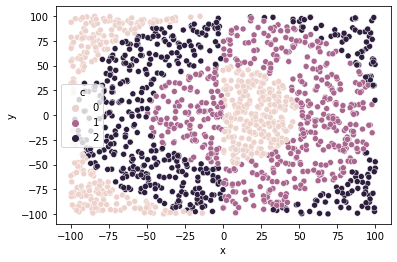

In [4]:
sns.scatterplot(data=df_train, x='x', y='y', hue='c');

#### Model 1 - without softmax

In [10]:
net1_1 = mlp.NeuralNetwork()
net1_1.add(mlp.Layer(2))
net1_1.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net1_1.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net1_1.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net1_1.add(mlp.Layer(3, activation_fun=mlp.ActivationTanh(), add_bias=False))

In [11]:
net1_1.train(x_train, y_train, x_test, y_test, epochs=100, learning_rate=0.01, batch_size=10, loss_function=mlp.LossMSE(f1_score=True))

c:\Users\matem\PycharmProjects\miowad\MultiLayerPerceptron.py:279: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP/(TP+FP)


Epoch:    1/100,  MSE loss train:    0.799,  test:    0.893   |   F1 macro train:    0.223,  test:    0.194
Epoch:   11/100,  MSE loss train:     0.17,  test:    0.164   |   F1 macro train:    0.559,  test:    0.561
Epoch:   21/100,  MSE loss train:    0.158,  test:    0.152   |   F1 macro train:    0.685,  test:    0.667
Epoch:   31/100,  MSE loss train:    0.143,  test:    0.141   |   F1 macro train:    0.736,  test:    0.711
Epoch:   41/100,  MSE loss train:    0.129,  test:    0.131   |   F1 macro train:    0.775,  test:    0.755
Epoch:   51/100,  MSE loss train:    0.123,  test:    0.125   |   F1 macro train:    0.794,  test:    0.773
Epoch:   61/100,  MSE loss train:    0.118,  test:    0.119   |   F1 macro train:    0.809,  test:    0.784
Epoch:   71/100,  MSE loss train:    0.112,  test:    0.114   |   F1 macro train:    0.821,  test:    0.788
Epoch:   81/100,  MSE loss train:    0.108,  test:     0.11   |   F1 macro train:    0.824,  test:    0.798
Epoch:   91/100,  MSE loss t

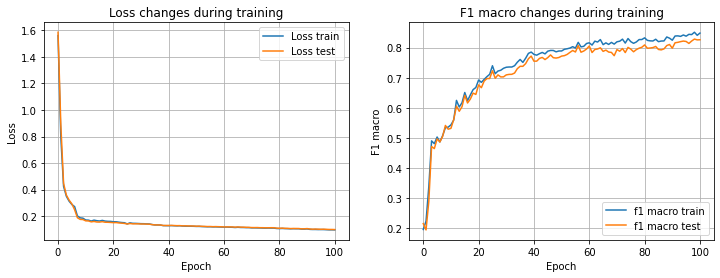

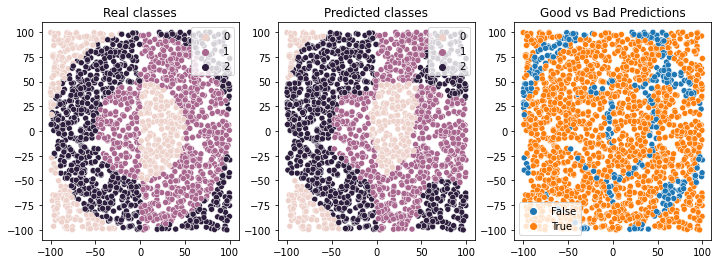

In [12]:
net1_1.plot_training_history()
plot_good_vs_bad_predictions(net1_1, x_test, y_test)

#### Model 2 - with softmax

In [13]:
net1_2 = mlp.NeuralNetwork()
net1_2.add(mlp.Layer(2))
net1_2.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net1_2.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net1_2.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net1_2.add(mlp.Layer(3, activation_fun=mlp.ActivationSoftmax(), add_bias=False))

In [14]:
net1_2.train(x_train, y_train, x_test, y_test, epochs=100, learning_rate=0.01,\
            batch_size=10, loss_function=mlp.LossCrossEntropy())

c:\Users\matem\PycharmProjects\miowad\MultiLayerPerceptron.py:279: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP/(TP+FP)


Epoch:    1/100,  CrossEntropy loss train:    1.009,  test:    0.919   |   F1 macro train:    0.311,  test:    0.331
Epoch:   11/100,  CrossEntropy loss train:    0.805,  test:    0.773   |   F1 macro train:    0.515,  test:    0.513
Epoch:   21/100,  CrossEntropy loss train:     0.64,  test:    0.619   |   F1 macro train:     0.73,  test:    0.715
Epoch:   31/100,  CrossEntropy loss train:    0.498,  test:     0.49   |   F1 macro train:    0.816,  test:    0.804
Epoch:   41/100,  CrossEntropy loss train:    0.413,  test:    0.412   |   F1 macro train:    0.842,  test:    0.827
Epoch:   51/100,  CrossEntropy loss train:    0.374,  test:    0.368   |   F1 macro train:     0.84,  test:    0.839
Epoch:   61/100,  CrossEntropy loss train:     0.35,  test:    0.341   |   F1 macro train:    0.842,  test:    0.842
Epoch:   71/100,  CrossEntropy loss train:    0.309,  test:     0.31   |   F1 macro train:     0.86,  test:    0.864
Epoch:   81/100,  CrossEntropy loss train:    0.305,  test:    0

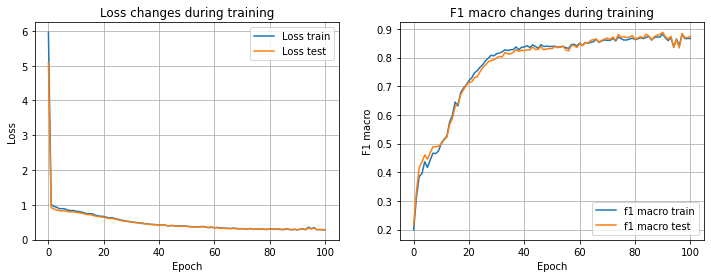

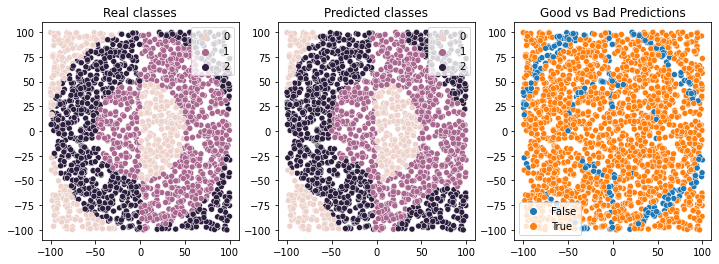

In [15]:
net1_2.plot_training_history()
plot_good_vs_bad_predictions(net1_2, x_test, y_test)

## Dataset 2: easy

In [16]:
df_train = pd.read_csv('data/classification/easy-training.csv')
df_test = pd.read_csv('data/classification/easy-test.csv')
print(df_test.head())

x_train = df_train.loc[:,df_train.columns!='c'].to_numpy().tolist()
y_train = pd.get_dummies(df_train.loc[:,df_train.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()
x_test = df_train.loc[:,df_train.columns!='c'].to_numpy().tolist()
y_test = pd.get_dummies(df_train.loc[:,df_train.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()

print(f"\n Unique classes: {np.unique(y_train)}")

           x          y      c
0  88.836312  35.105689   True
1   8.454690  57.210448  False
2 -57.221426  29.312467  False
3 -11.922723 -88.264355   True
4   8.885765   6.605795   True

 Unique classes: [0 1]


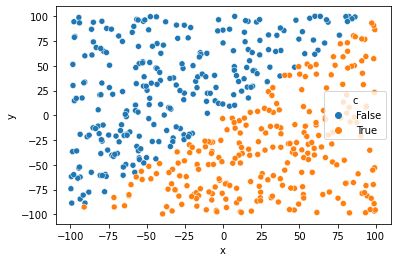

In [17]:
sns.scatterplot(data=df_train, x='x', y='y', hue='c');

#### Model 1 - without softmax

In [26]:
net2_1 = mlp.NeuralNetwork()
net2_1.add(mlp.Layer(2))
net2_1.add(mlp.Layer(5, activation_fun=mlp.ActivationSigmoid()))
net2_1.add(mlp.Layer(5, activation_fun=mlp.ActivationSigmoid()))
net2_1.add(mlp.Layer(2, activation_fun=mlp.ActivationSigmoid(), add_bias=False))

In [27]:
net2_1.train(x_train, y_train, x_test, y_test, epochs=50, learning_rate=0.03, batch_size=10, loss_function=mlp.LossMSE(f1_score=True))

c:\Users\matem\PycharmProjects\miowad\MultiLayerPerceptron.py:279: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP/(TP+FP)


Epoch:    1/50,  MSE loss train:    0.251,  test:    0.251   |   F1 macro train:    0.333,  test:    0.333
Epoch:    6/50,  MSE loss train:     0.21,  test:     0.21   |   F1 macro train:    0.982,  test:    0.982
Epoch:   11/50,  MSE loss train:    0.191,  test:    0.191   |   F1 macro train:    0.984,  test:    0.984
Epoch:   16/50,  MSE loss train:    0.169,  test:    0.169   |   F1 macro train:     0.99,  test:     0.99
Epoch:   21/50,  MSE loss train:    0.145,  test:    0.145   |   F1 macro train:    0.994,  test:    0.994
Epoch:   26/50,  MSE loss train:    0.122,  test:    0.122   |   F1 macro train:    0.998,  test:    0.998
Epoch:   31/50,  MSE loss train:    0.101,  test:    0.101   |   F1 macro train:    0.998,  test:    0.998
Epoch:   36/50,  MSE loss train:    0.083,  test:    0.083   |   F1 macro train:    0.998,  test:    0.998
Epoch:   41/50,  MSE loss train:    0.068,  test:    0.068   |   F1 macro train:    0.996,  test:    0.996
Epoch:   46/50,  MSE loss train:    0

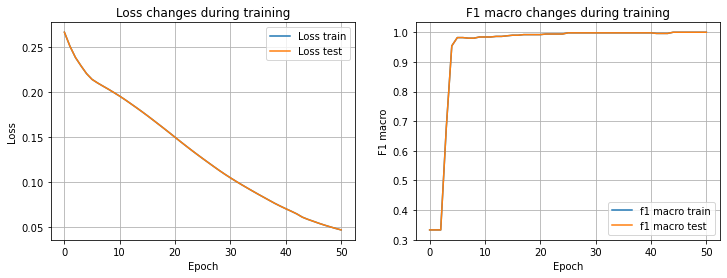

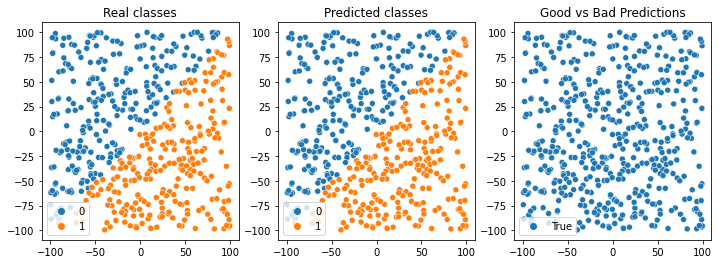

In [28]:
net2_1.plot_training_history()
plot_good_vs_bad_predictions(net2_1, x_test, y_test)

#### Model 2 - with softmax

In [40]:
net2_2 = mlp.NeuralNetwork()
net2_2.add(mlp.Layer(2))
net2_2.add(mlp.Layer(5, activation_fun=mlp.ActivationReLU()))
net2_2.add(mlp.Layer(5, activation_fun=mlp.ActivationReLU()))
net2_2.add(mlp.Layer(2, activation_fun=mlp.ActivationSoftmax(), add_bias=False))

In [41]:
net2_2.train(x_train, y_train, x_test, y_test, epochs=50, learning_rate=0.03, batch_size=10, loss_function=mlp.LossCrossEntropy())

Epoch:    1/50,  CrossEntropy loss train:    0.281,  test:    0.281   |   F1 macro train:    0.893,  test:    0.893
Epoch:    6/50,  CrossEntropy loss train:    0.123,  test:    0.123   |   F1 macro train:     0.93,  test:     0.93
Epoch:   11/50,  CrossEntropy loss train:     0.06,  test:     0.06   |   F1 macro train:    0.962,  test:    0.962
Epoch:   16/50,  CrossEntropy loss train:    0.086,  test:    0.086   |   F1 macro train:    0.948,  test:    0.948
Epoch:   21/50,  CrossEntropy loss train:    0.047,  test:    0.047   |   F1 macro train:    0.964,  test:    0.964
Epoch:   26/50,  CrossEntropy loss train:    0.069,  test:    0.069   |   F1 macro train:    0.958,  test:    0.958
Epoch:   31/50,  CrossEntropy loss train:    0.053,  test:    0.053   |   F1 macro train:    0.958,  test:    0.958
Epoch:   36/50,  CrossEntropy loss train:    0.097,  test:    0.097   |   F1 macro train:    0.938,  test:    0.938
Epoch:   41/50,  CrossEntropy loss train:    0.053,  test:    0.053   | 

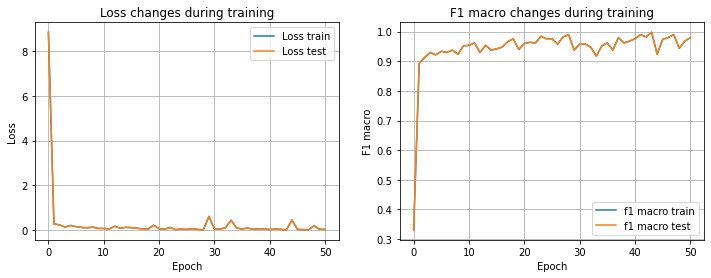

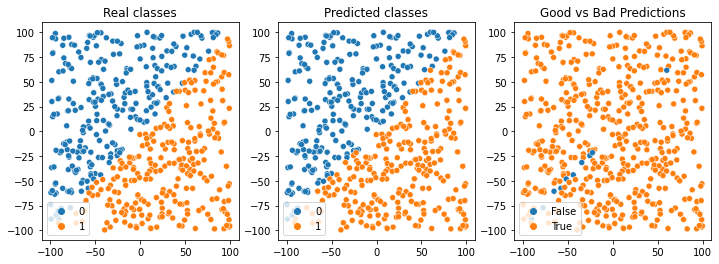

In [42]:
net2_2.plot_training_history()
plot_good_vs_bad_predictions(net2_2, x_test, y_test)

## Dataset 3: xor3

In [43]:
df_train = pd.read_csv('data/classification/xor3-training.csv')
df_test = pd.read_csv('data/classification/xor3-test.csv')
print(df_test.head())

x_train = df_train.loc[:,df_train.columns!='c'].to_numpy().tolist()
y_train = pd.get_dummies(df_train.loc[:,df_train.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()
x_test = df_train.loc[:,df_train.columns!='c'].to_numpy().tolist()
y_test = pd.get_dummies(df_train.loc[:,df_train.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()

print(f"\nUnique classes: {np.unique(y_train)}")

           x          y  c
0  36.973203 -55.586985  0
1  39.495972  78.216447  0
2  78.443533  77.156005  0
3   9.559384  -6.161679  0
4  42.216651  48.249953  0

Unique classes: [0 1]


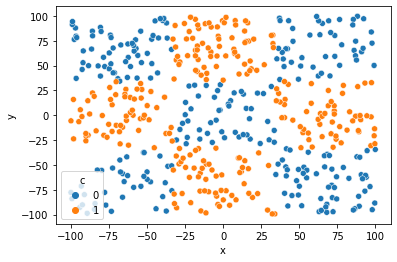

In [44]:
import seaborn as sns
sns.scatterplot(data=df_train, x='x', y='y', hue='c');

#### Model 1 - without softmax

In [157]:
net3_1 = mlp.NeuralNetwork()
net3_1.add(mlp.Layer(2))
net3_1.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net3_1.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net3_1.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net3_1.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net3_1.add(mlp.Layer(2, activation_fun=mlp.ActivationSigmoid(), add_bias=False))

In [158]:
net3_1.train(x_train, y_train, x_test, y_test, epochs=1000, learning_rate=0.03, batch_size=50, loss_function=mlp.LossMSE(f1_score=True))

c:\Users\matem\PycharmProjects\miowad\MultiLayerPerceptron.py:279: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP/(TP+FP)


Epoch:    1/1000,  MSE loss train:    0.445,  test:    0.445   |   F1 macro train:    0.333,  test:    0.333
Epoch:  101/1000,  MSE loss train:     0.11,  test:     0.11   |   F1 macro train:    0.851,  test:    0.851
Epoch:  201/1000,  MSE loss train:    0.099,  test:    0.099   |   F1 macro train:    0.857,  test:    0.857
Epoch:  301/1000,  MSE loss train:    0.095,  test:    0.095   |   F1 macro train:    0.861,  test:    0.861
Epoch:  401/1000,  MSE loss train:    0.091,  test:    0.091   |   F1 macro train:    0.868,  test:    0.868
Epoch:  501/1000,  MSE loss train:    0.089,  test:    0.089   |   F1 macro train:     0.87,  test:     0.87
Epoch:  601/1000,  MSE loss train:    0.088,  test:    0.088   |   F1 macro train:    0.876,  test:    0.876
Epoch:  701/1000,  MSE loss train:    0.086,  test:    0.086   |   F1 macro train:    0.878,  test:    0.878
Epoch:  801/1000,  MSE loss train:    0.085,  test:    0.085   |   F1 macro train:     0.88,  test:     0.88
Epoch:  901/1000,  

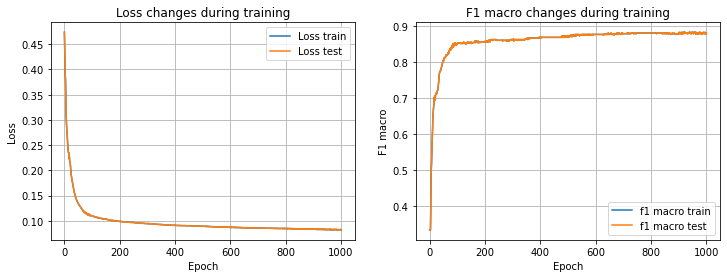

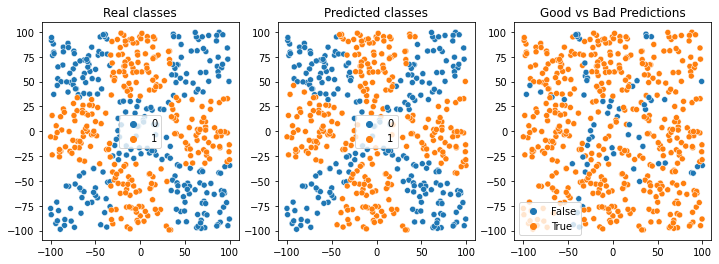

In [159]:
net3_1.plot_training_history()
plot_good_vs_bad_predictions(net3_1, x_test, y_test)

#### Model 2 - with softmax

In [151]:
net3_2 = mlp.NeuralNetwork()
net3_2.add(mlp.Layer(2))
net3_2.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net3_2.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net3_2.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net3_2.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net3_2.add(mlp.Layer(2, activation_fun=mlp.ActivationSoftmax(), add_bias=False))

In [152]:
net3_2.train(x_train, y_train, x_test, y_test, epochs=1000, learning_rate=0.03,batch_size=50, loss_function=mlp.LossCrossEntropy())

c:\Users\matem\PycharmProjects\miowad\MultiLayerPerceptron.py:279: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP/(TP+FP)


Epoch:    1/1000,  CrossEntropy loss train:    5.178,  test:    5.178   |   F1 macro train:    0.333,  test:    0.333
Epoch:  101/1000,  CrossEntropy loss train:    0.375,  test:    0.375   |   F1 macro train:    0.834,  test:    0.834
Epoch:  201/1000,  CrossEntropy loss train:    0.348,  test:    0.348   |   F1 macro train:    0.849,  test:    0.849
Epoch:  301/1000,  CrossEntropy loss train:    0.313,  test:    0.313   |   F1 macro train:    0.871,  test:    0.871
Epoch:  401/1000,  CrossEntropy loss train:    0.299,  test:    0.299   |   F1 macro train:    0.874,  test:    0.874
Epoch:  501/1000,  CrossEntropy loss train:    0.262,  test:    0.262   |   F1 macro train:    0.887,  test:    0.887
Epoch:  601/1000,  CrossEntropy loss train:    0.228,  test:    0.228   |   F1 macro train:      0.9,  test:      0.9
Epoch:  701/1000,  CrossEntropy loss train:    0.334,  test:    0.334   |   F1 macro train:    0.856,  test:    0.856
Epoch:  801/1000,  CrossEntropy loss train:    0.278,  t

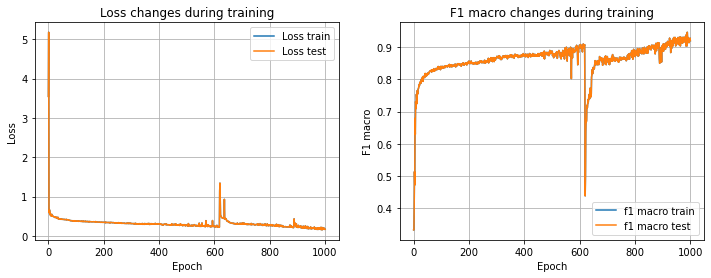

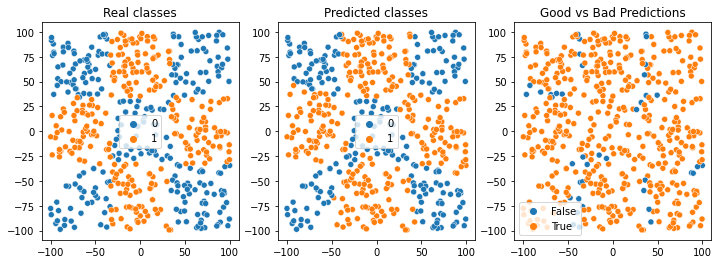

In [153]:
net3_2.plot_training_history()
plot_good_vs_bad_predictions(net3_2, x_test, y_test)

## Summary 

### Results

f1 macro for `rings3-regular` dataset:
- train:    0.867
- test:     0.875

f1 macro for the `easy` dataset:
- train:    1
- test:     1

f1 macro for the `xor3` dataset:
- train:    0.92
- test:     0.92


### Learning speed vs softmax

In general, I have observed that `softmax` is better than no `softmax` for the every dataset tested here, however it is not crucial to achieve high f1 scores.
